# <font color='#0000AA'>Relatório de Análise</font>
---

## Importando dados

In [17]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Localizando a base de dados na máquina
pwd = '/home/joel/Documentos/Dados/exames.csv'

# Instânciando o objeto dataframe
df = pd.read_csv(pwd, usecols=['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'diagnostico'])

In [3]:
mapper = {
    'M' : 1,
    'B' : 0
}

df.replace(mapper, inplace=True)

## Análise descritiva

In [4]:
df.head(10)

,diagnostico,exame_1,exame_2,exame_5,exame_6,exame_7
0,1,17.99,10.38,1001.0,0.11840,0.27760
1,1,20.57,17.77,1326.0,0.08474,0.07864
2,1,19.69,21.25,1203.0,0.10960,0.15990
3,1,11.42,20.38,386.1,0.14250,0.28390
4,1,20.29,14.34,1297.0,0.10030,0.13280
5,1,12.45,15.70,477.1,0.12780,0.17000
6,1,18.25,19.98,1040.0,0.09463,0.10900
7,1,13.71,20.83,577.9,0.11890,0.16450
8,1,13.00,21.82,519.8,0.12730,0.19320
9,1,12.46,24.04,475.9,0.11860,0.23960


In [5]:
df.describe()

,diagnostico,exame_1,exame_2,exame_5,exame_6,exame_7
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,654.889104,0.096360,0.104341
std,0.483918,3.524049,4.301036,351.914129,0.014064,0.052813
min,0.000000,6.981000,9.710000,143.500000,0.052630,0.019380
25%,0.000000,11.700000,16.170000,420.300000,0.086370,0.064920
50%,0.000000,13.370000,18.840000,551.100000,0.095870,0.092630
75%,1.000000,15.780000,21.800000,782.700000,0.105300,0.130400
max,1.000000,28.110000,39.280000,2501.000000,0.163400,0.345400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diagnostico  569 non-null    int64  
 1   exame_1      569 non-null    float64
 2   exame_2      569 non-null    float64
 3   exame_5      569 non-null    float64
 4   exame_6      569 non-null    float64
 5   exame_7      569 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.shape

(569, 6)

In [8]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)

report.to_file('relatorio.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
report

<AxesSubplot:>

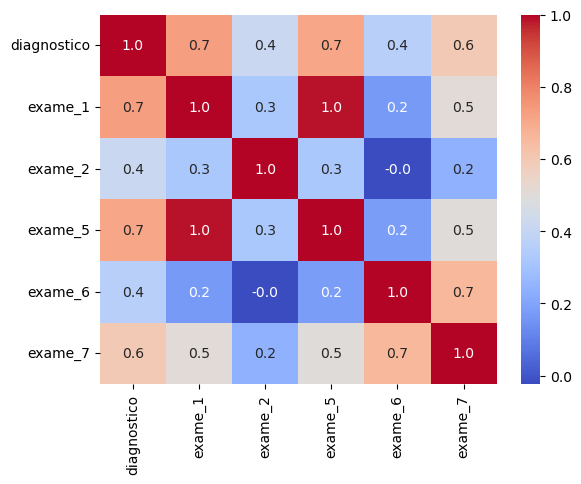

In [19]:
sns.heatmap(df.corr(), fmt='.1f', annot=True, cmap='coolwarm')

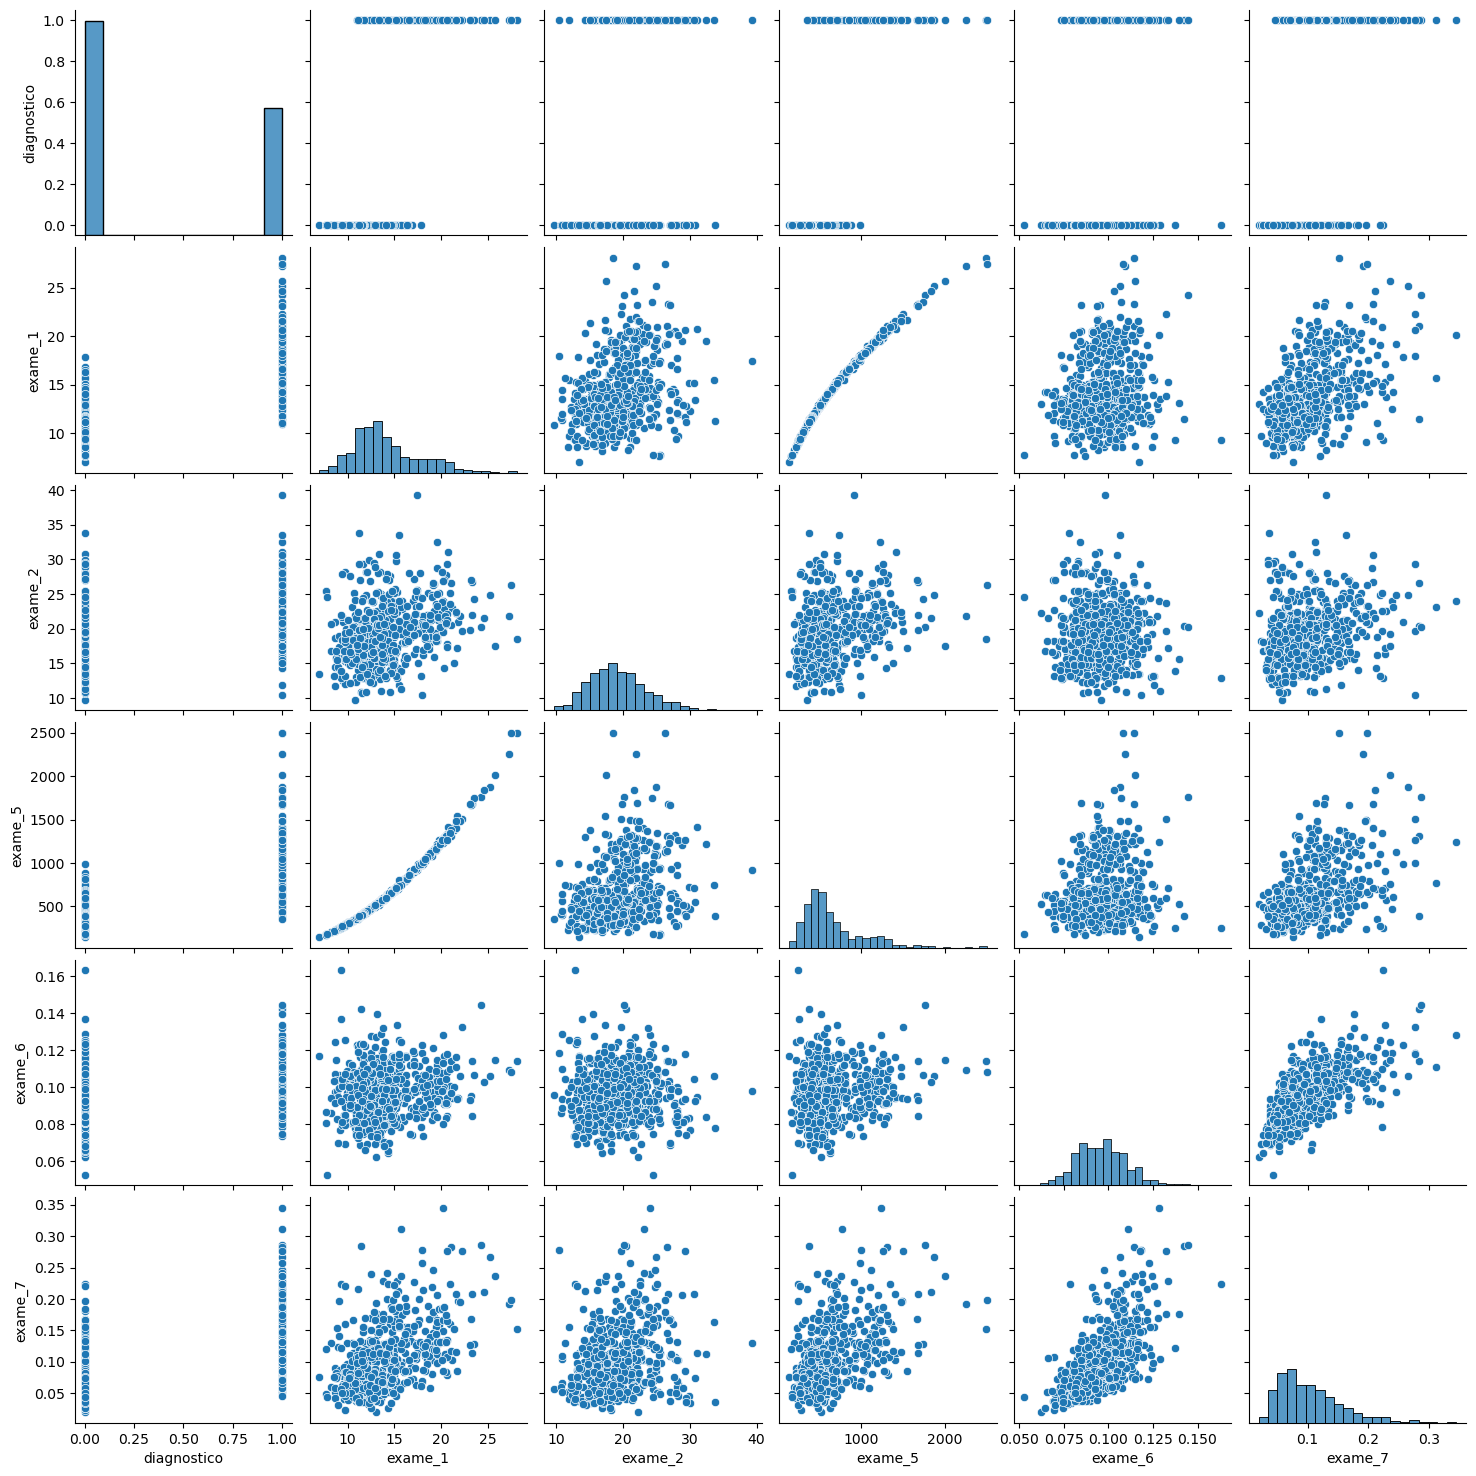

In [20]:
sns.pairplot(df)

In [22]:
x = df.drop(['diagnostico'], axis=1)
y = df['diagnostico']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.88